# Proyecto integrado Introduccion

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Abre el archivo de datos y estudia la información general 

In [97]:
#cargar liberias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene, ttest_ind
import numpy as np

In [2]:
games =  pd.read_csv("/datasets/games.csv")

In [3]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


# Paso 2. Prepara los datos

In [5]:
games.columns = games.columns.str.lower()
print(games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [6]:
print(games[games['name'].isna()])
games['name'] = games['name'].str.strip()
games=games.dropna(subset=['name']).reset_index(drop=True)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [7]:
print(games[games['year_of_release'].isna()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16371  PDC World Championship Darts 2008      PSP              NaN   
16403                      Freaky Flyers       GC              NaN   
16446                          Inversion       PC              NaN   
16456        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16520                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [8]:
games.sort_values(by=['name', 'platform'], inplace=True)

# Llena los valores faltantes en 'Año de lanzamiento' hacia adelante por grupo de 'Nombre'
games['year_of_release'] = games.groupby('name')['year_of_release'].fillna(method='ffill')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 4727 to 9133
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16520 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
games['year_of_release'].isna().sum()

193

In [11]:
games=games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype(int)

In [12]:
games['user_score'] = games['user_score'].fillna('tbd')

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16520 non-null  object 
 1   platform         16520 non-null  object 
 2   year_of_release  16520 non-null  int64  
 3   genre            16520 non-null  object 
 4   na_sales         16520 non-null  float64
 5   eu_sales         16520 non-null  float64
 6   jp_sales         16520 non-null  float64
 7   other_sales      16520 non-null  float64
 8   critic_score     8040 non-null   float64
 9   user_score       16520 non-null  object 
 10  rating           9831 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [14]:
games["total_sales"]=games["na_sales"]+games["eu_sales"]+games["jp_sales"]+games["other_sales"]
print(games.head())

                                      name platform  year_of_release  \
0                              '98 Koshien       PS             1998   
1               .hack//G.U. Vol.1//Rebirth      PS2             2006   
2             .hack//G.U. Vol.2//Reminisce      PS2             2006   
3  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2             2006   
4            .hack//G.U. Vol.3//Redemption      PS2             2007   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0        Sports      0.15      0.10      0.12         0.03           NaN   
1  Role-Playing      0.00      0.00      0.17         0.00           NaN   
2  Role-Playing      0.11      0.09      0.00         0.03           NaN   
3  Role-Playing      0.00      0.00      0.16         0.00           NaN   
4  Role-Playing      0.00      0.00      0.17         0.00           NaN   

  user_score rating  total_sales  
0        tbd    NaN         0.40  
1        tbd    NaN         0.17  
2    

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

- Lo que pude deducir es que logre rellenar los años ausentes de algunos juegos ya que contaba con el año de lanzamiento porque el mismo juego en otra plataforma si tenia el dato de año y por ende cuando sale un juego normalmente sale el mismo año en diferentes plataformas, respecto a "critic_score" pienso que son datos los cuales no pueden ser ya que habra una razon por la cual esta vacio no se vendieron juegos los suficientes juegos como para colocarle esa calificacion o no fue escencial,sobre "user_score" algunos datos estaban vacios y otros decian tbd como se supone que son datos por determinar rellene los datos vacios con la palabra tbd ya que si no tiene calificacion se supone que esta por determinar aun su calificacion y sobre "rating" tambien lo deje vacios ya que no tengo informacion sobre que tipo de juego es y no hay forma de asignarle una calificacion



# Paso 3. Analiza los datos

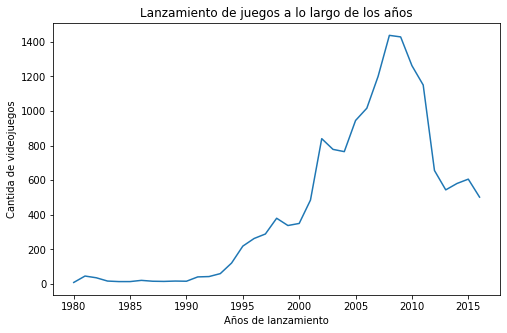

In [15]:
games.groupby("year_of_release")["name"].count().plot(ylabel="Cantida de videojuegos"
                                                      ,xlabel="Años de lanzamiento"
                                                      ,title="Lanzamiento de juegos a lo largo de los años"
                                                    ,figsize=[8,5])

plt.show()

¿Son significativos los datos de cada período?

- Si porque como podemos ver la mayoria de ventas se encuentran de 1997 hacia 2013 se lanzaron una gran cantidad de videojuegos

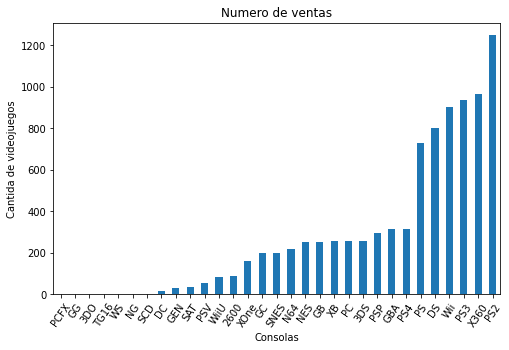

In [16]:
games.groupby("platform")["total_sales"].sum().sort_values().plot(kind="bar",rot=55,ylabel="Cantida de videojuegos"
                                                      ,xlabel="Consolas"
                                                      ,title="Numero de ventas"
                                                      ,figsize=[8,5])

plt.show()

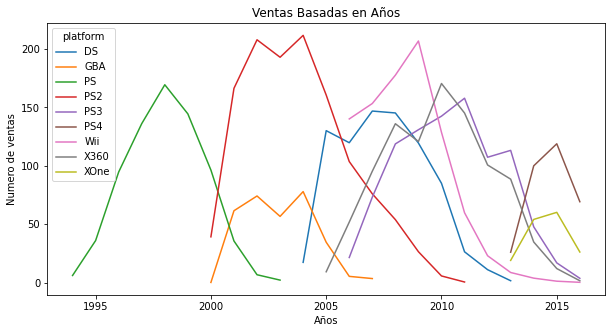

In [17]:
top_plataform_games = games[games["platform"].isin(["GBA","PS4","PS", "DS", "Wii","PS3","X360","PS2","XOne"])]
pivot_data = top_plataform_games[top_plataform_games["year_of_release"]>1992].pivot_table(index='year_of_release',
                            columns='platform',
                            values='total_sales',
                            aggfunc='sum'
                           ).plot(title="Ventas Basadas en Años",xlabel="Años",ylabel="Numero de ventas",figsize=[10,5])

- Podemos ver que las que aproximadamente las cosolas duran unos 5 años sale una nueva generacion de consola 

- La PS2, PS3 y X360 son las consolas que mas ventas tuvieron pero apartir del 2010 que salieron las nuevas generaciones sus ventas disminuyeron

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

- Considero que los datos que deberia determinar son del años 2013 para arriba ya que salieron nuevas generaciones de consolas las cuales hasta donde se encuentran estos datos aun venden en ese momento 

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

- Las plataformas lideres considero que son "PS", "DS", "Wii","PS3","X360"y"PS2" que en su tiempo vendieron mucho y conforme pasaron los años se reducieron sus ventas. pero si no enfocamos hacia el futuro las rentables son PS4 , XOne y PC ya que son consolas de nueva generacion y los juegos tiene que desarrolarse para estas y la PC porque sus ventas fueron bajas pero estables nunca terminan ya que la mayoria de juegos casi siempre estan para PC

In [18]:
top_platforms=games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(11).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC'],
      dtype='object', name='platform')


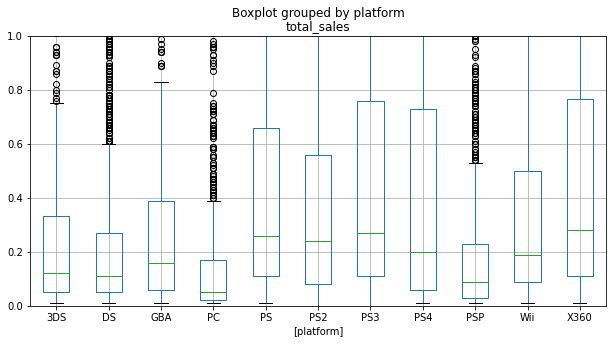

In [19]:
games[games["platform"].isin(top_platforms)][["platform","total_sales"]].boxplot(by="platform",figsize=[10,5])
plt.ylim(0,1)

plt.show()

- No son muy significativas ya que las ventas de las primera 6 cnosolas que venden mas excepto por la PS2 sus ventas son casi iguales

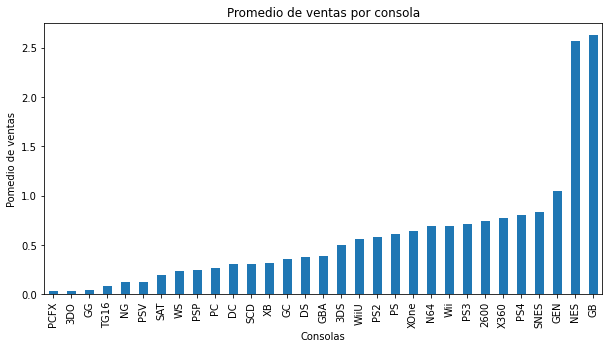

In [20]:
games.groupby("platform")["total_sales"].mean().sort_values().plot(kind="bar"
                                                                  ,title="Promedio de ventas por consola",
                                                                  xlabel="Consolas",
                                                                  ylabel="Pomedio de ventas",
                                                                  figsize=[10,5])
plt.show()

- Podemos ver que el promedio se lo lleva NES y GB que tiene un promedio de ventas iguales y significativamente mayor a las demas consolas

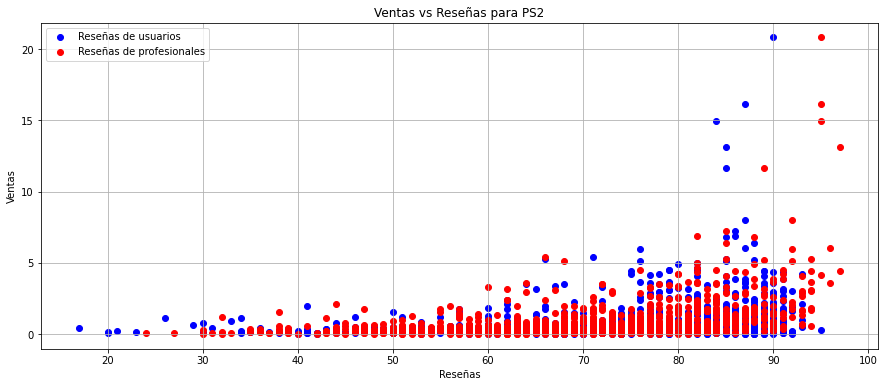

In [21]:
platform_data = games[(games['platform'] == 'PS2')&(games['user_score'] != 'tbd')]
platform_data = platform_data.copy()
platform_data['user_score']=platform_data['user_score'].astype(float)
platform_data['user_score']=platform_data['user_score']*10
plt.figure(figsize=(15, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], color='blue', label='Reseñas de usuarios')
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], color='red', label='Reseñas de profesionales')
plt.title('Ventas vs Reseñas para PS2')
plt.xlabel('Reseñas')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

- Podemos ver que si hay una correlacion de las ventas comparandolas con las reseñas de los profesionales con la de usuarios


In [22]:
print(games.groupby("name")["platform"].nunique().sort_values(ascending=False))

name
Need for Speed: Most Wanted          10
LEGO Marvel Super Heroes              9
Ratatouille                           9
Madden NFL 07                         9
FIFA 14                               9
                                     ..
Inazuma Eleven GO                     1
Inazuma Eleven GO 3: Galaxy           1
Inazuma Eleven GO Strikers 2013       1
Inazuma Eleven Go 2: Chrono Stone     1
¡Shin Chan Flipa en colores!          1
Name: platform, Length: 11426, dtype: int64


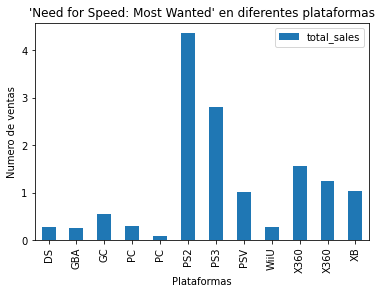

In [23]:
varias_plataformas=games[games["name"]=="Need for Speed: Most Wanted"].reset_index(drop=True)
varias_plataformas.plot(x="platform",y="total_sales",kind="bar",title="'Need for Speed: Most Wanted' en diferentes plataformas"
                       ,xlabel="Plataformas"
                       ,ylabel="Numero de ventas")
plt.show()

- Elegi Need for Speed: Most Wanted para compararlo con las diferente plataformas ya que es el juego que cuenta con mayor plataformas y vemos que sus ventas son mayores en PS2 y PS3

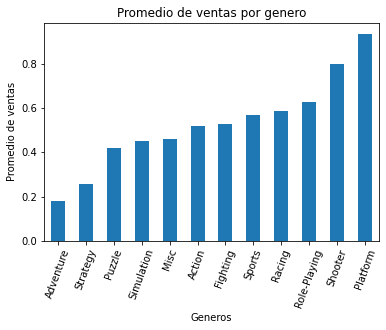

In [24]:
games.groupby("genre")["total_sales"].mean().sort_values().plot(kind="bar",title="Promedio de ventas por genero"
                                                               ,xlabel="Generos"
                                                               ,ylabel="Promedio de ventas"
                                                               ,rot=70)
plt.show()

- Podemos ver que los genero que mas venden son Shooter y Platform, los generos que menos venden son Adventure y Strategy. los demas generos venden en promedio casi igual

# Paso 4. Crea un perfil de usuario para cada región

In [25]:
top_platforms_na=games[games["year_of_release"]>2013].groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5).index
top_platforms_eu=games[games["year_of_release"]>2013].groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5).index
top_platforms_jp=games[games["year_of_release"]>2013].groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5).index

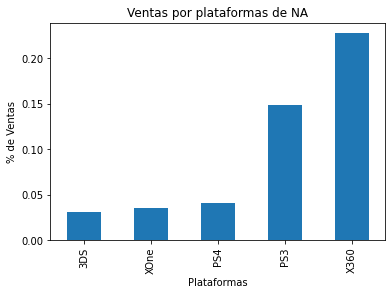

In [71]:
sales_na_filter=games[games["platform"].isin(top_platforms_na)]
sales_na=sales_na_filter.groupby("platform")["na_sales"].sum()/sales_na_filter["total_sales"].sum()
sales_na.sort_values().plot(kind="bar",title="Ventas por plataformas de NA",xlabel="Plataformas",ylabel="% de Ventas")
plt.show()

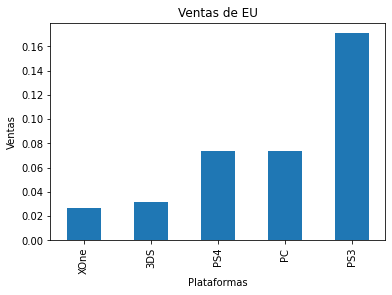

In [51]:
sales_eu_filter=games[games["platform"].isin(top_platforms_eu)]
sales_eu=sales_eu_filter.groupby("platform")["eu_sales"].sum()/sales_eu_filter["total_sales"].sum()
sales_eu.sort_values().plot(kind="bar",title="Ventas por plataformas de EU",xlabel="Plataformas",ylabel="% de Ventas")
plt.show()

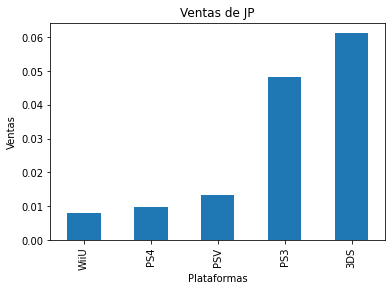

In [52]:
sales_jp_filter=games[games["platform"].isin(top_platforms_jp)]
sales_jp=sales_jp_filter.groupby("platform")["jp_sales"].sum()/sales_jp_filter["total_sales"].sum()
sales_jp.sort_values().plot(kind="bar",title="Ventas por plataformas de JP",xlabel="Plataformas",ylabel="% de Ventas")
plt.show()

- Como podemos ver en cada region predomina una consola y tambien otras como ps3,ps4 que puede ser tambien estar en el top de ventas, todos estos datos estoy basandome en datos apartir de 2013 ya que son las ultimas consolas en base a la base de datos

In [29]:
top_genre_na=games[games["year_of_release"]>2013].groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5).index
top_genre_eu=games[games["year_of_release"]>2013].groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5).index
top_genre_jp=games[games["year_of_release"]>2013].groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5).index

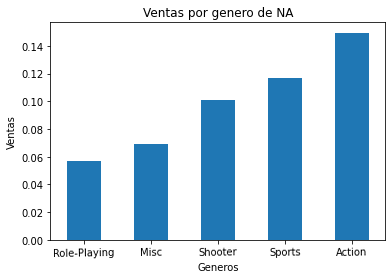

In [58]:
genre_na_filter=games[games["genre"].isin(top_genre_na)]
genre_na=genre_na_filter.groupby("genre")["na_sales"].sum()/genre_na_filter["total_sales"].sum()
genre_na.sort_values().plot(kind="bar",title="Ventas por genero de NA",xlabel="Generos",ylabel="% de Ventas",rot=1)
plt.show()

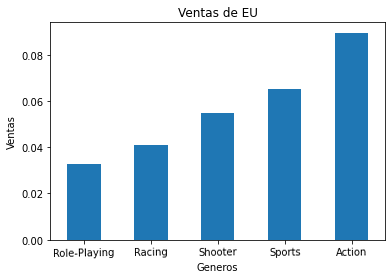

In [59]:
genre_eu_filter=games[games["genre"].isin(top_genre_eu)]
genre_eu=genre_eu_filter.groupby("genre")["eu_sales"].sum()/genre_eu_filter["total_sales"].sum()
genre_eu.sort_values().plot(kind="bar",title="Ventas por genero de EU",xlabel="Generos",ylabel="% de Ventas",rot=1)
plt.show()

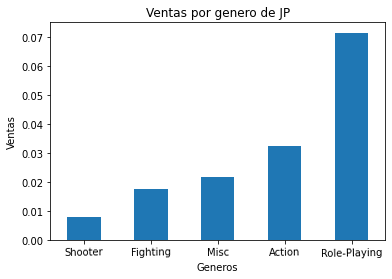

In [61]:
genre_jp_filter=games[games["genre"].isin(top_genre_jp)]
genre_jp=genre_jp_filter.groupby("genre")["jp_sales"].sum()/genre_jp_filter["total_sales"].sum()
genre_jp.sort_values().plot(kind="bar",title="Ventas por genero de JP",xlabel="Generos",ylabel="% de Ventas",rot=1)
plt.show()

- Respecto a los generos podemos decir que en EU y NA los genero que ams predominan son Action, Sports y Shooter en cambio en JP los generos predominantes son Role-Playing, Action, Misc. Tambien podemos determinar que los juegos de Action y Shooter predominan en las 3 regiones, estoy basandome en datos apartir de 2013 ya que son las ultimas consolas en base a la base de datos

In [33]:
ultimos_years=games[games["year_of_release"]>2013]

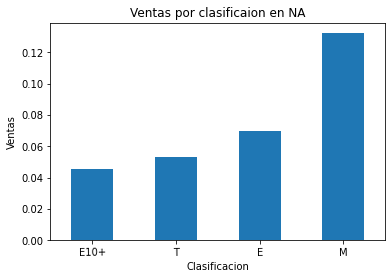

In [65]:
rating_na=ultimos_years.groupby("rating")["na_sales"].sum()/ultimos_years["total_sales"].sum()
rating_na.sort_values().plot(kind="bar",title="Ventas por clasificaion en NA",xlabel="Clasificacion",ylabel="% de Ventas",rot=1)
plt.show()

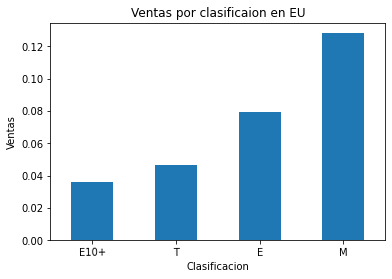

In [66]:
rating_eu=ultimos_years.groupby("rating")["eu_sales"].sum()/ultimos_years["total_sales"].sum()
rating_eu.sort_values().plot(kind="bar",title="Ventas por clasificaion en EU",xlabel="Clasificacion",ylabel="% de Ventas",rot=1)
plt.show()

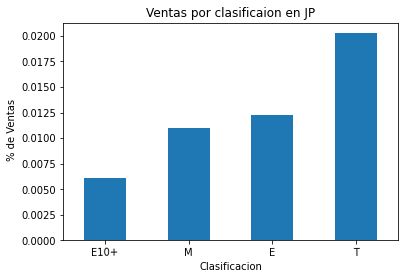

In [70]:
rating_jp=ultimos_years.groupby("rating")["jp_sales"].sum()/ultimos_years["total_sales"].sum()
rating_jp.sort_values().plot(kind="bar",title="Ventas por clasificaion en JP",xlabel="Clasificacion",ylabel=" % de Ventas",rot=1)
plt.show()

- Respecto ala clasificacion que se le da a los videojuegos en base a cada region podemos decir que las top son T, E y M son las clasificaciones que tiene los juego que se mantiene con mayores ventas

# Paso 5. Prueba las siguientes hipótesis

In [87]:
filter_notna=games[games["user_score"]!="tbd"]
filter_notna = filter_notna.copy()
filter_notna["user_score"]=filter_notna["user_score"].astype(float)

xbox_one_data = filter_notna[filter_notna['platform'] == 'XOne']
pc_data = filter_notna[filter_notna['platform'] == 'PC']

q1_xo = xbox_one_data['user_score'].quantile(0.25)
q3_xo = xbox_one_data['user_score'].quantile(0.75)
iqr_xo = q3_xo - q1_xo

limite_inferior_xo = q1_xo - (1.5 * iqr_xo)
limite_superior_xo = q3_xo + (1.5 * iqr_xo)

df_sin_atipicos_xbox = xbox_one_data[(xbox_one_data['user_score'] > limite_inferior_xo) & (xbox_one_data['user_score'] < limite_superior_xo)]

q1_pc = pc_data['user_score'].quantile(0.25)
q3_pc = pc_data['user_score'].quantile(0.75)
iqr_pc = q3_pc - q1_pc

limite_inferior_pc = q1_pc - (1.5 * iqr_pc)
limite_superior_pc = q3_pc + (1.5 * iqr_pc)

df_sin_atipicos_pc = pc_data[(pc_data['user_score'] > limite_inferior_pc) & (pc_data['user_score'] < limite_superior_pc)]

In [100]:
variance_xo = np.var(df_sin_atipicos_xbox['user_score'])
variance_pc = np.var(df_sin_atipicos_pc['user_score'])
print(variance_xo)
print(variance_pc)

1.2989179548156957
1.857179820415879


In [109]:
statistic, p_value=levene(df_sin_atipicos_xbox['user_score'], df_sin_atipicos_pc['user_score'])

print("Estadístico de la prueba de Levene:", statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de igualdad de varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas.")

Estadístico de la prueba de Levene: 3.1871811900861844
Valor p: 0.0745515926906807
No hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas.


In [102]:
t_statistic, p_value = stats.ttest_ind(xbox_one_data['user_score'], pc_data['user_score'],equal_var = False)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.")

Estadística t: -4.650307279038621
Valor p: 4.987462409263676e-06
Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


- Las hipotesis se determinan por si exiten cambios en entre el promedio de de las calificaciones de estas 2 consolas y vemos que si son diferentes

In [105]:
action = filter_notna[filter_notna['genre'] == 'Action']
sports = filter_notna[filter_notna['genre'] == 'Sports']



q1_ac = action['user_score'].quantile(0.25)
q3_ac = action['user_score'].quantile(0.75)
iqr_ac = q3_ac - q1_ac

limite_inferior_ac = q1_ac - (1.5 * iqr_ac)
limite_superior_ac = q3_ac + (1.5 * iqr_ac)

df_sin_atipicos_ac = action[(action['user_score'] > limite_inferior_ac) & (action['user_score'] < limite_superior_ac)]

q1_sp = sports['user_score'].quantile(0.25)
q3_sp = sports['user_score'].quantile(0.75)
iqr_sp = q3_sp - q1_sp

limite_inferior_sp = q1_sp - (1.5 * iqr_sp)
limite_superior_sp = q3_sp + (1.5 * iqr_sp)

df_sin_atipicos_sp = sports[(sports['user_score'] > limite_inferior_sp) & (sports['user_score'] < limite_superior_sp)]


In [106]:
variance_ac = np.var(action['user_score'])
variance_sp = np.var(sports['user_score'])
print(variance_ac)
print(variance_sp)

2.028560844047405
2.6095451686591797


In [110]:
statistic, p_value=levene(df_sin_atipicos_ac['user_score'], df_sin_atipicos_sp['user_score'])

print("Estadístico de la prueba de Levene:", statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de igualdad de varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas.")

Estadístico de la prueba de Levene: 22.668945258713837
Valor p: 2.0218688791529364e-06
Hay evidencia significativa para rechazar la hipótesis nula de igualdad de varianzas.


In [111]:
t_statistic, p_value = stats.ttest_ind(df_sin_atipicos_ac['user_score'], df_sin_atipicos_sp['user_score'],equal_var = False)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los generos Action y Sports son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los generos Action y Sports son las mismas.")

Estadística t: 1.948199235466402
Valor p: 0.051531268699179254
No podemos rechazar la hipótesis nula: las calificaciones promedio de los generos Action y Sports son las mismas.


- Las hipotesis se determinan por si exiten cambios en entre el promedio de de las calificaciones de estos 2 generos y vemos que no son diferentes

# Paso 6. Escribe una conclusión general

- En general podemos decir que al inicio se observo los datos de manera general y habian columnas vacias como la de los años de lanzamiento como los calificaiones por parte de usuarios expertos y la clasificacion ya que son datos muy importantes y la cantidad que falta son significativos podriamos alterar los datos al colocarles un promedio para el caso de losa años se pudo obtener algunos datos de los mismos juego y para los demas se borraron para los datos de algunos juegos sin nombre tambien se borraron ya que no eran fundamentales, respecto al analisis se observo que las las empresas de las consolas al rededor de 5 años sacan nuevas generaciones de estas y sus picos de ventas de los son cuando esta salen al par de años luego empiezan a diminuir y denuevo empiezan a subir conforme aparece una nueva y eso es casi un patron vemos tambien consolas predominan mas en unas regiones como generos y clasificaiones de estos en resumen general podemos decir que en abse a estos datos si queremos lanzar un juego en una region predeterminada podemos hacerlo en base a una consola especifica como a un genero y una clasificaciones para obtener mayores naganacias es esa region especifica como tambien considerar todoestos datos para haci hacer un juego que cumpla con todas estas caractericas de cada region para que se un exito a nivel mundial